In [1]:
#OM NAMO NARAYANA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import jgraph
import networkx as nx

## Clustering of standard graphs
### Tutte graph
It's a cubic, planar and polyhedral graph
<img src = "http://mathworld.wolfram.com/images/eps-gif/TuttesGraph_1000.gif" alt = "Some examples of tuttle graphs. source:wolfram.com" title = "Titte graph"/>souce:wolfram.com

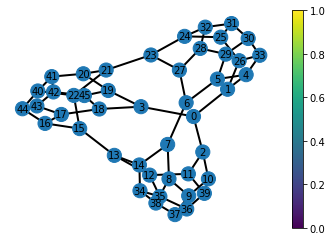

In [81]:
l = 200
#G = nx.generators.random_k_out_graph(l, 2, 0.5)
#G = petersen = nx.petersen_graph()
G = nx.tutte_graph()
#G = nx.generators.random_lobster(10, 1, 2)
#G = nx.generators.random_clustered_graph([(2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3)])
pos = nx.layout.spring_layout(G)
M = G.number_of_edges()
node_sizes = [200  for i in range(len(G))]
N = G.number_of_nodes()
node_color = range (3, N + 3)
#print(node_color[3])
edge_alphas = [(5+i)/(M+4) for i in range(M)]
nodes = nx.draw_networkx_nodes(G, pos, node_size = node_sizes, node_colors = node_color, label = np.arange(G.number_of_edges()))
edges = nx.draw_networkx_edges(G, pos, node_size  =node_sizes, arrowstyle = '->',
                              arrowsize = 10, 
                              edge_camp = plt.cm.Blues, width = 2)
nx.draw_networkx_labels(G, pos, font_size = 10)

#for i in range(M):
    #edges[i].set_alpha(edge_alphas[i])
pc = mpl.collections.PathCollection(edges)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

In [82]:
A = np.zeros((G.number_of_nodes(), G.number_of_nodes()))

for i in G.edges():
    A[i[0]][i[1]] = A[i[1]][i[0]] = 1

In [83]:
D = np.diag(np.sum(A, axis = 1))

In [84]:
L = D - A

In [85]:
vals, vecs = np.linalg.eig(L)
vecs = vecs[:, np.argsort(vals)]
vals = vals[np.argsort(vals)]

clusters = vecs[:, 1] > 0

In [86]:
p1 = np.arange(len(clusters))[clusters]
p2 = np.arange(len(clusters))[~clusters]

30


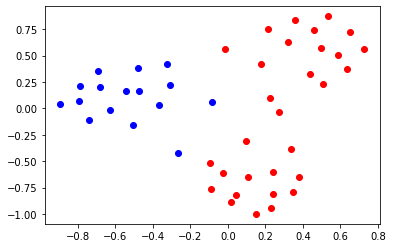

In [87]:
pos_set1 = []
for i in p1:
    pos_set1.append(pos[i])
pos_set2 = []
for i in p2:
    pos_set2.append(pos[i])
pos_set1 = np.array(pos_set1)
pos_set2 = np.array(pos_set2)
print(len(pos_set1))
plt.plot(pos_set1.T[0], pos_set1.T[1], 'ro', data = np.arange(len(pos_set1)))
plt.plot(pos_set2.T[0], pos_set2.T[1], 'bo')

### K nearest neighbours
We can use K nearest neighbours to build our graphs. So given a set of coordinates for each point we can use K nearest neighbours to build our graph. Here K is the _hyper parameter_. 

In [10]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
import numpy as np

In [11]:
X, labels = make_circles(n_samples = 500, noise = 0.1, factor=.2)

A = kneighbors_graph(X, n_neighbors = 10).toarray()
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
D = np.diag(A.sum(axis = 1))
L = D-A

vals, vecs = np.linalg.eig(L)

In [13]:
vecs = vecs[:, np.argsort(vals)]
vals = vals[np.argsort(vals)]

clusters = vecs[:, 1] > 0

In [14]:
set1 = X[clusters]
set2 = X[~(clusters)]

(-1.213191300963095,
 1.2847711234824413,
 -1.3120610495900786,
 1.3066492373381378)

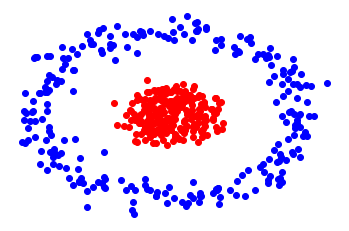

In [15]:
plt.plot(set1.T[0], set1.T[1], 'ro')
plt.plot(set2.T[0], set2.T[1], 'bo')
plt.axis(False)